**1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) x (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [3]:
def BetaBinomPlotting(n, num_success, alpha, beta, x, y, title, hyp=0):
    """
    [Likelihood]
    n : number of trials
    num_success : number of success (y)
    hyp : to extensify scale of likelihood (default=0)
    
    [Prior]
    alpha : alpha
    beta : beta
    
    [Axs]
    x, y : plot location
    """
    prior = st.beta(alpha, beta)
    post = st.beta(alpha+num_success, beta+n-num_success)
    thetas = np.linspace(0, 1, 300)
    
    plt.style.use('ggplot')
    axs[x, y].plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    axs[x, y].plot(thetas, (10**hyp)*likelihood(thetas, n, num_success), label='Likelihood', c='orange')
    axs[x, y].plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    
    axs[x, y].set_title(title)
    axs[x, y].set_xlabel(r'$\theta$')
    axs[x, y].set_ylabel('Density')
    axs[x, y].legend();

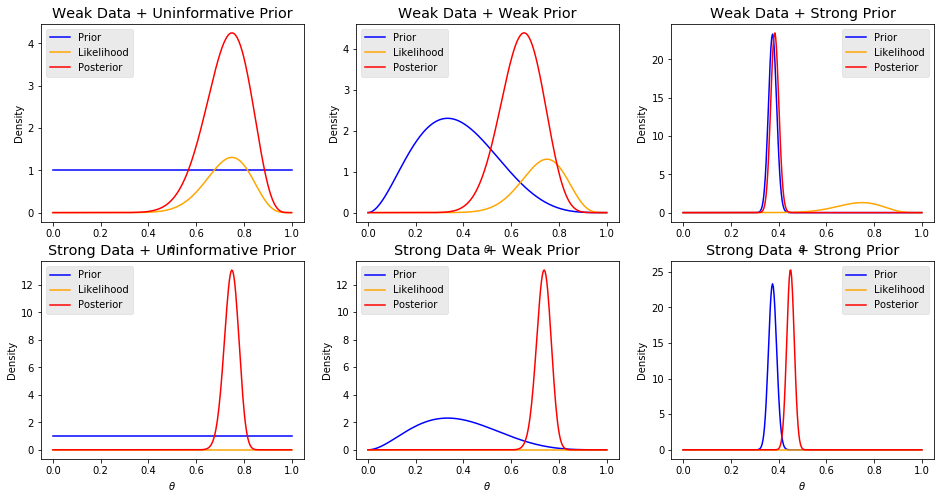

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

hyp=5
BetaBinomPlotting(20, 15, 1, 1, 0, 0, "Weak Data + Uninformative Prior", hyp)
BetaBinomPlotting(20, 15, 3, 5, 0, 1, "Weak Data + Weak Prior", hyp)
BetaBinomPlotting(20, 15, 300, 500, 0, 2, "Weak Data + Strong Prior", hyp)
BetaBinomPlotting(200, 150, 1, 1, 1, 0, "Strong Data + Uninformative Prior", hyp)
BetaBinomPlotting(200, 150, 3, 5, 1, 1, "Strong Data + Weak Prior", hyp)
BetaBinomPlotting(200, 150, 300, 500, 1, 2, "Strong Data + Strong Prior", hyp)

# fig.tight_layout()

**2) BDA 1.3 Exercise**  
  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$.  
  
Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$.  
  
Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$.  
  
Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.  

**문제** : 부모가 각각 하나씩 물려주는 염색체가 눈동자 색을 결정한다. (xx : Bl, Xx 또는 XX : Br)  

\* Xx와 xX는 구분하지 않고 사용			* 너무 간단한 계산은 생략  

Pr(xx) = $p^2$, Pr(Xx) = $2p(1-p)$, Pr(XX) = $(1-p)^2$  

Xx 염색체를 가질 때 (hetero) 각 염색체가 유전될 확률은 1/2이다.  

  
**1. Br 부모 -> Br 자녀가 Xx 염색체를 가질 확률은 $\dfrac{2p}{1+2p}$ 이다?**

아래 참고. 분모 분자 정리하면 증명 가능 !

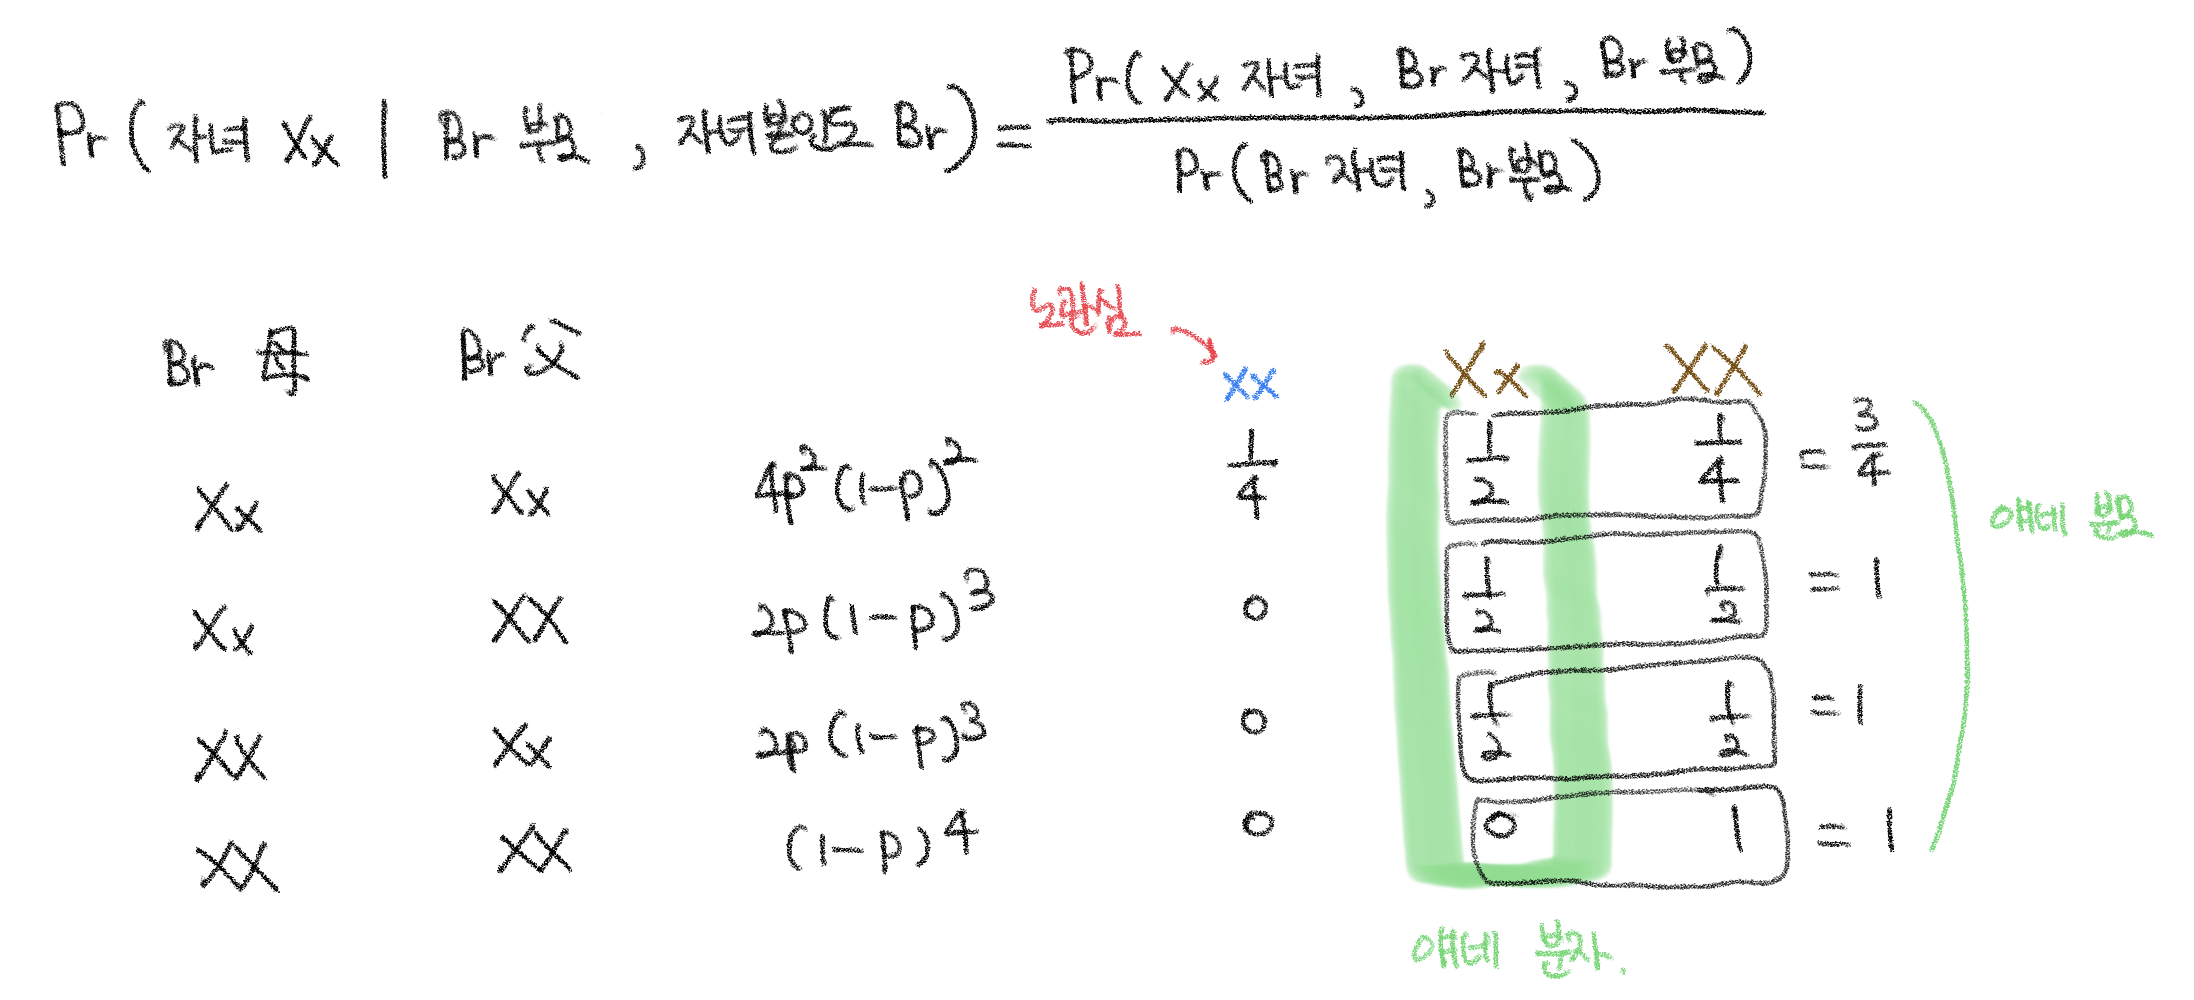

In [5]:
Image("./1주차 복습스터디/1.png")

Judy의 가계도


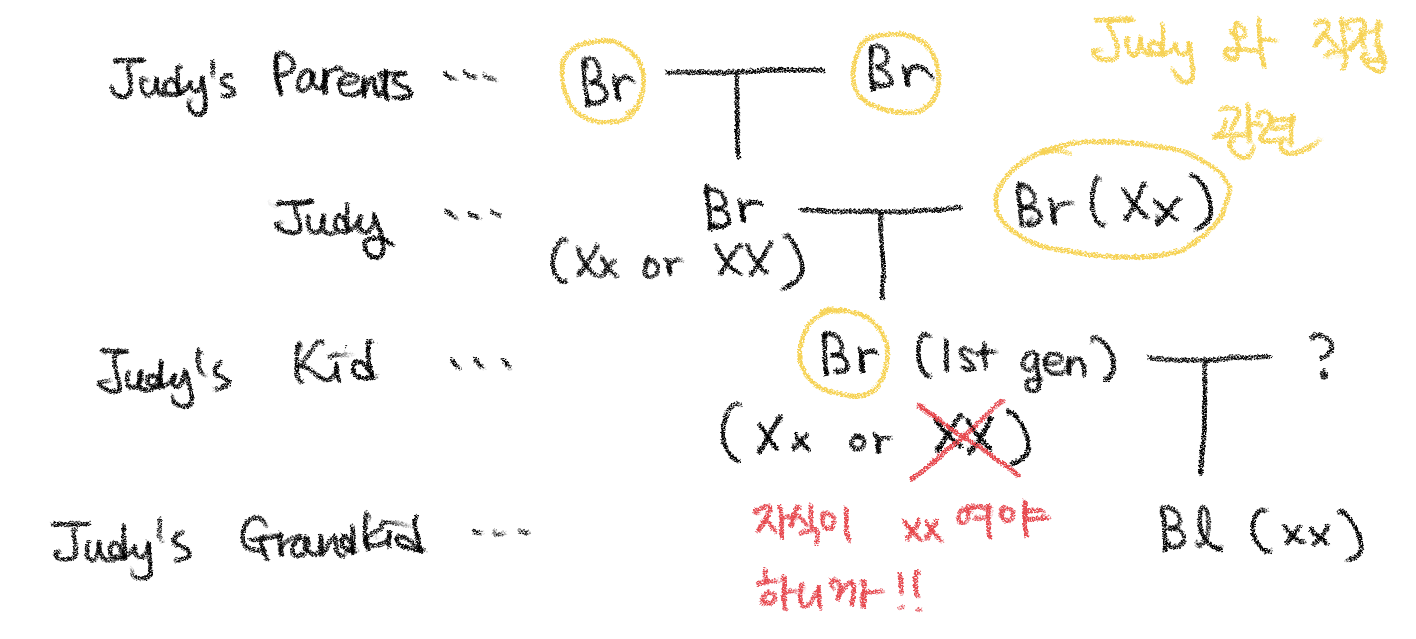

In [6]:
print("Judy의 가계도")
Image("./1주차 복습스터디/2-1.png")

**2. Pr(Judy is Xx | n Childs Br, married Xx) = ??**  

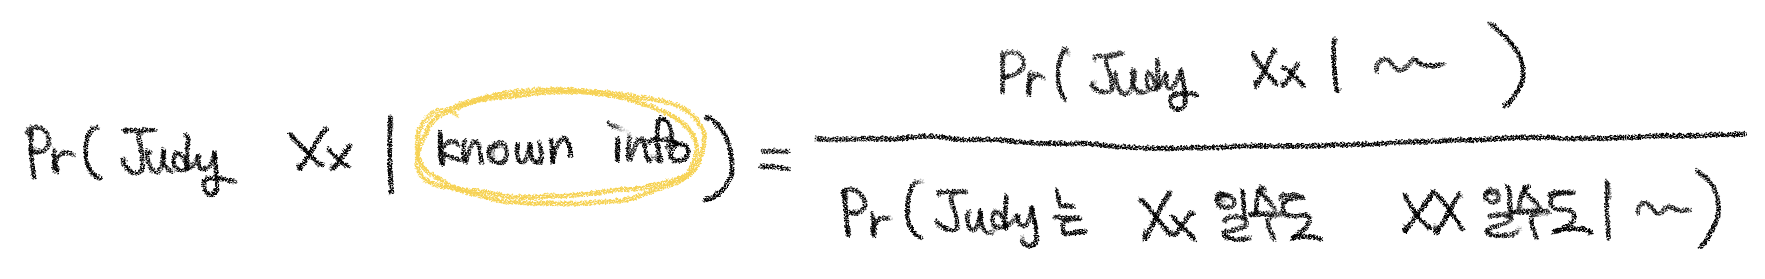

In [7]:
Image("./1주차 복습스터디/2-2.png")

대충 생각하면 위와 같다. 부모가 모두 Br 갈색눈이라고 했으니 Judy가 xx(파란눈)일리는 없고 Xx거나 XX일텐데 그 중에 Xx일 상황에 관심이 있다.  

여기서 known info는 Judy와 직접적으로 관련이 있는 사람들에 대해 우리가 알고 있는 정보들이다.  

- n명의 자녀들이 모두 Br  

​    ----사실 이 아래는 주어진 정보 (fixed constant)이다. 확률 어쩌구 할게 없음 ----  

- Xx인 남편과 결혼함  
- 부모님이 모두 Br  

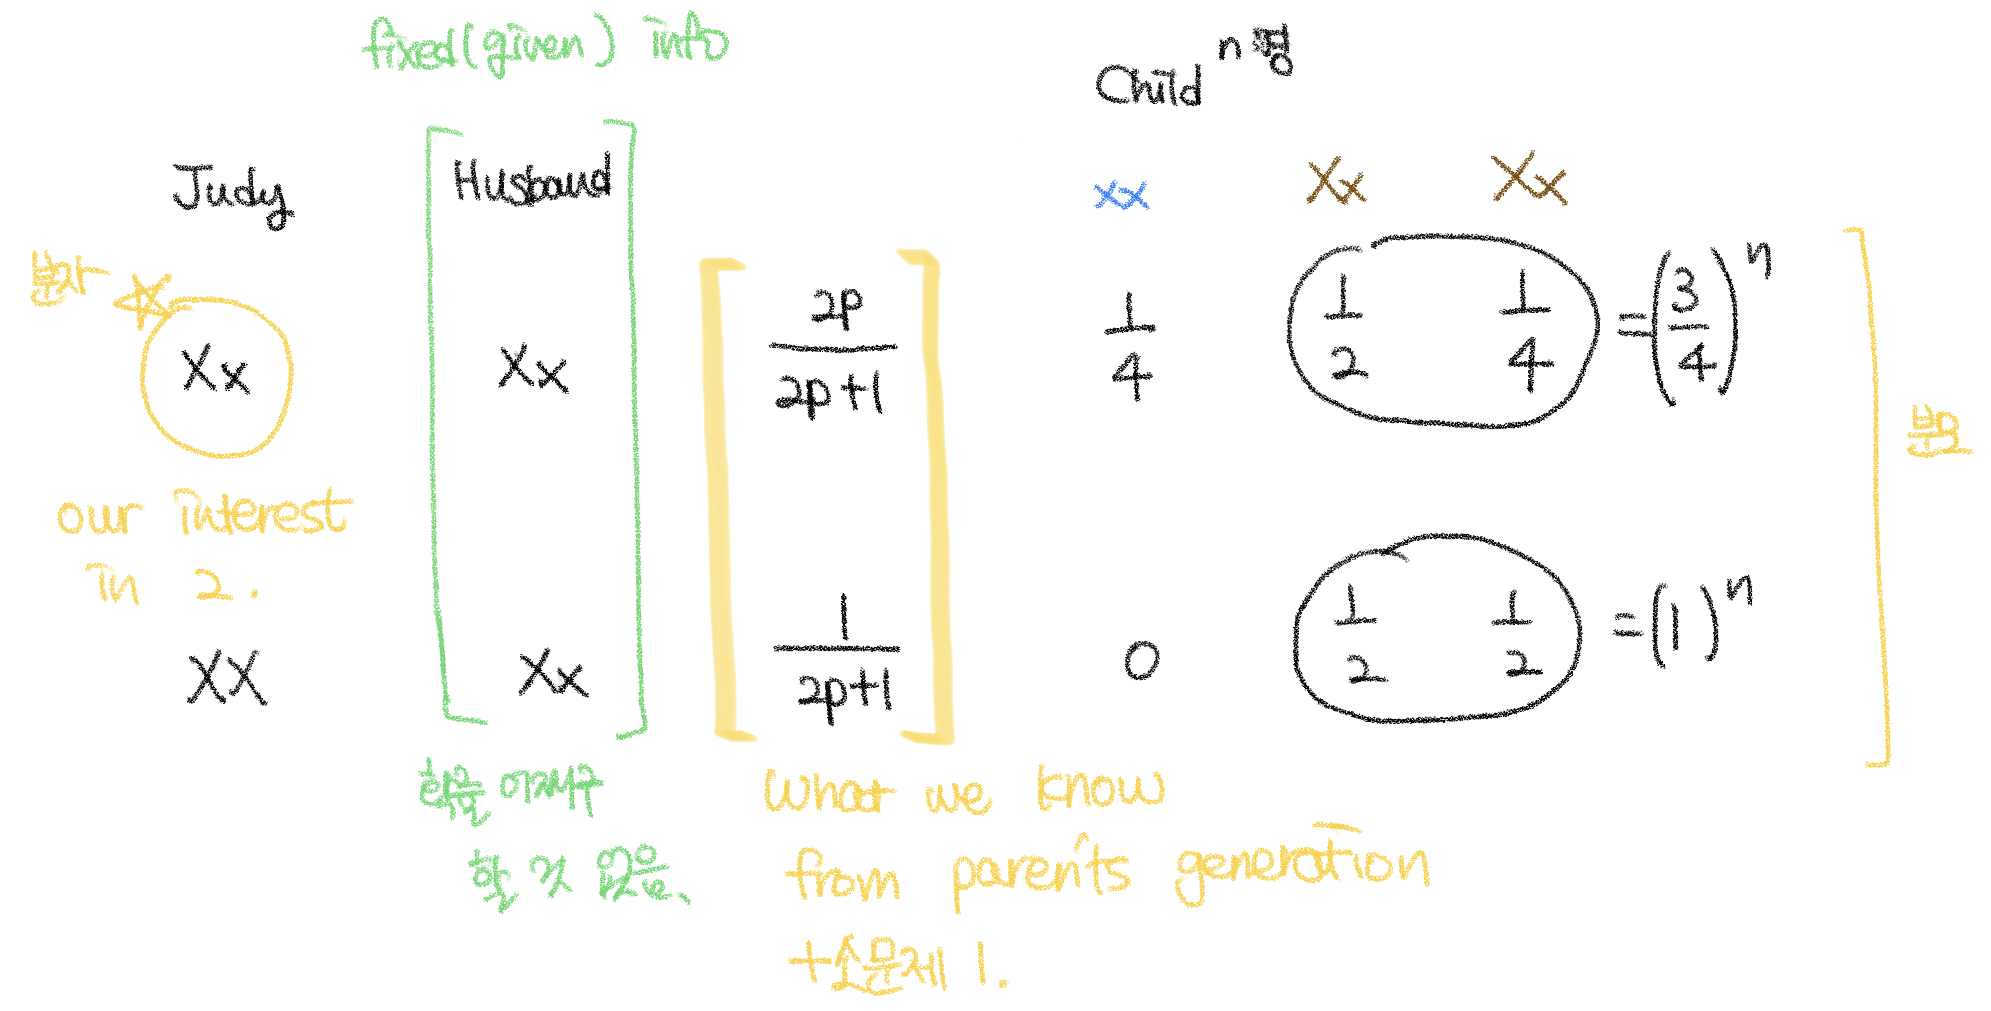

In [8]:
Image("./1주차 복습스터디/2-3.png")

**1번에서 부모가 갈색 눈이고 자녀도 갈색 눈일 때 그 자녀의 염색체가 Xx일 확률을 구했는데 그게 딱 Judy와 Judy의 부모님 이야기!**  
  
기본적으로 그 전 세대(generation)의 정보를 주어진 것 (Prior)라고 생각하고 이전 세대의 정보를 활용하여 현재 세대의 정보에 대해 이야기하고자 함. 이 경우에도 무작정 Judy의 세대부터 추론을 해보려고 하면 마땅히 주어지는 정보가 없음. 위에서 P(Xx) = ~, P(XX) = ~ 이런게 주어지는 것 처럼 Judy의 부모님 세대에 대해서 뭐라도 정보가 있어야 Judy가 Xx인게 말이 되고 추론을 할 거 아닌가..  
  
그러니까 여기서 부모 세대의 정보가 Prior의 역할을 한다. (라고 해설에 나와있기는 한데 Bayes rule 생각하지 말고 P(Xx) = ~, P(XX) = ~ 처럼 그냥 주어진 정보, 우리가 **확실**히 알고 있는 정보라고 생각하면 편함)  

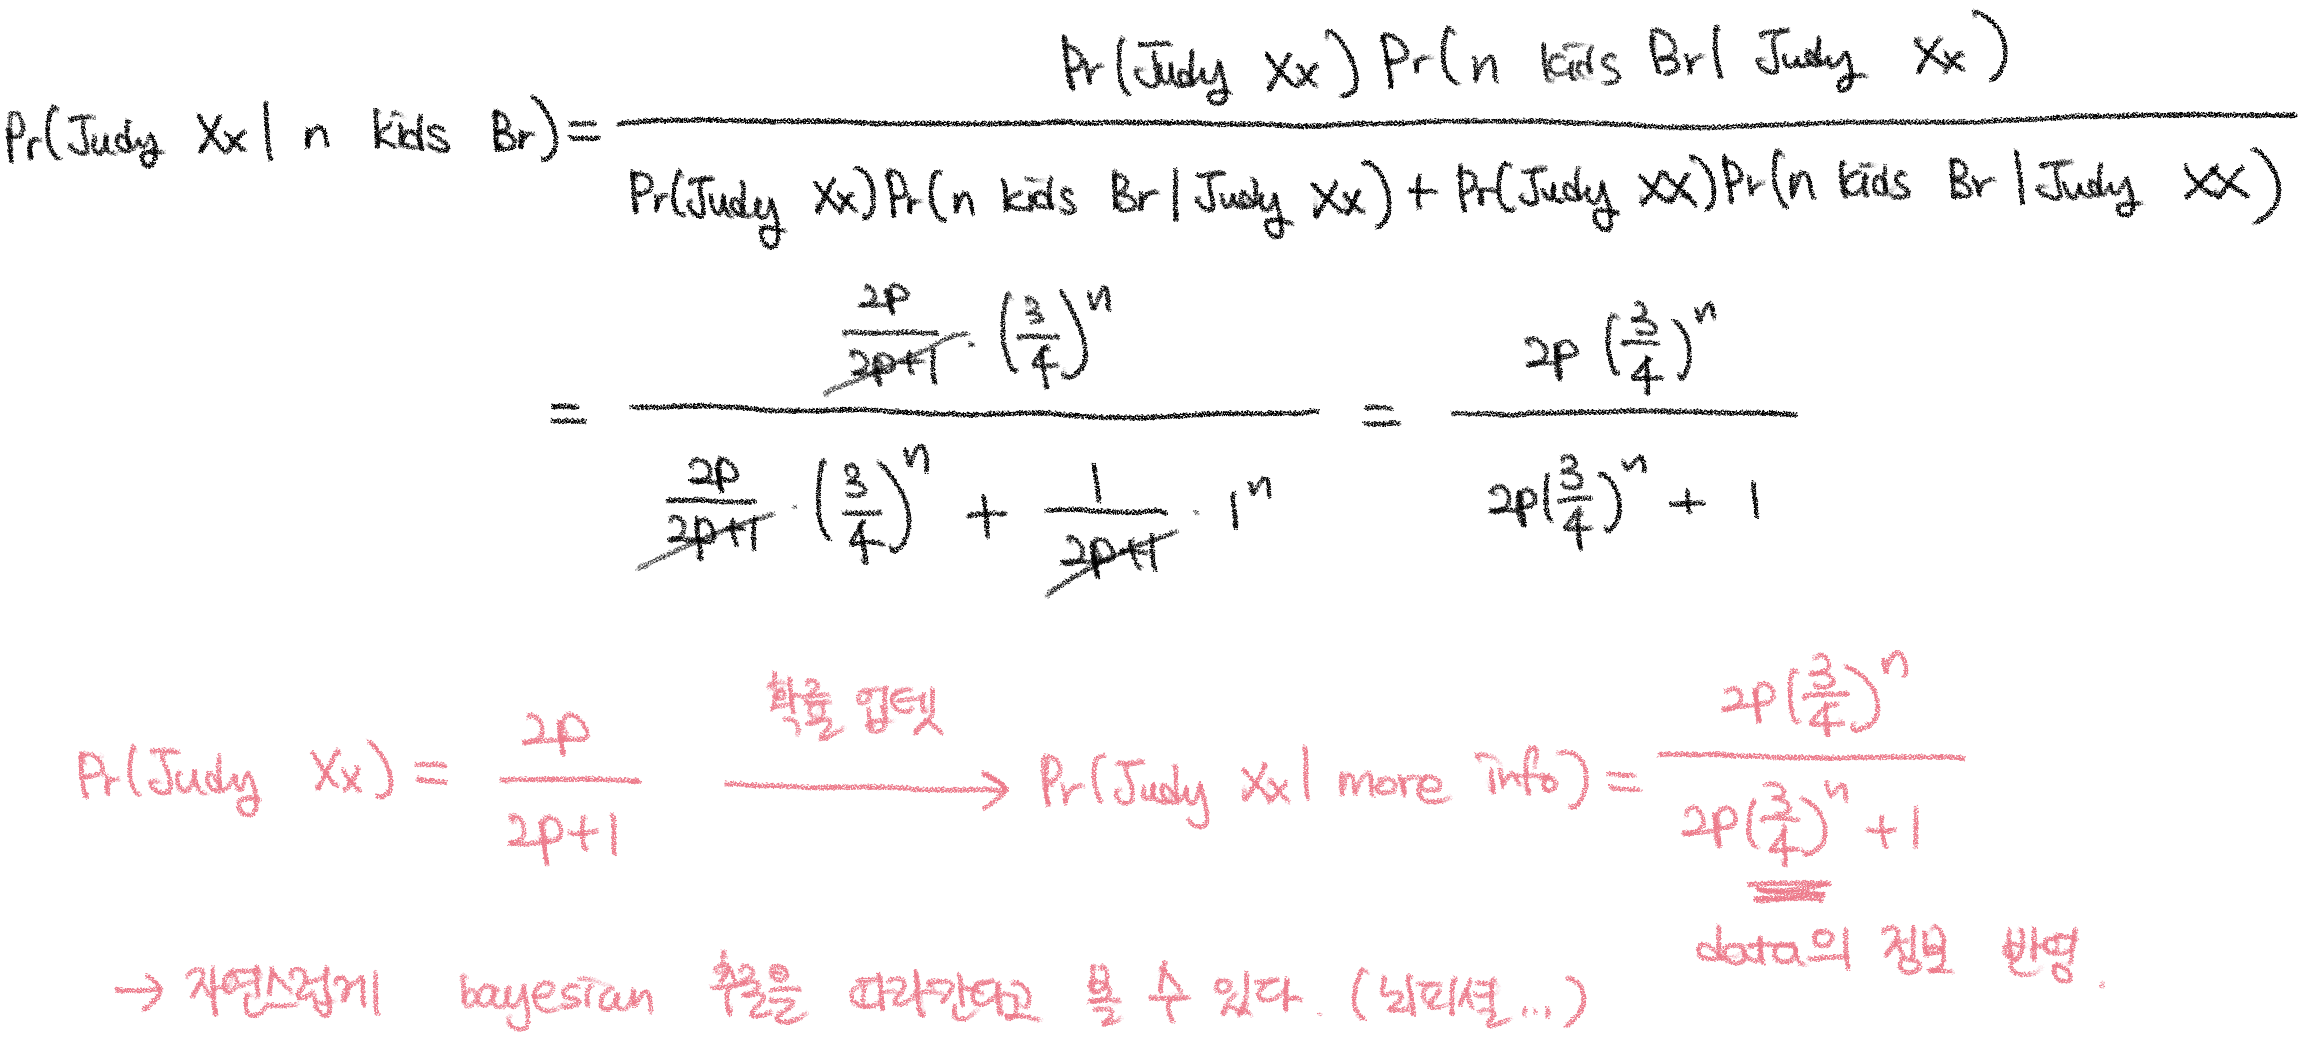

In [9]:
Image("./1주차 복습스터디/2-4.png")

**3. Pr(Judy's 1st grandkid Blue eye a.k.a. xx | all info) = ??**  
  
\* 이 상황에서는 Judy가 Xx인지 XX인지 모름!  
  
우선 Judy의 kid에 대해서 생각해보자.  
  
Judy의 염색체 + 남편의 염색체 + 자녀 본인의 눈색깔로 Judy's kid의 염색체를 알 수 있는데 위에서 말했다시피 문제에서 남편의 염색체(Br-Xx)와 자녀 본인의 눈색깔 (Br)은 주어졌으므로 uncertain한 것은 Judy의 염색체 뿐이다. (Xx or XX)  
  
Pr(Judy's kid Xx | all info so far) = Pr(Judy's kid Xx | Judy?+ kid Br+ 남편 Xx)  
  
​	= Pr(Judy's kid Xx | **Judy Xx** + kid Br+ 남편 Xx)***Pr(Judy Xx+ kid Br+ 남편 Xx)** + Pr(Judy's kid Xx | **Judy XX** + kid Br+ 남편 Xx)***Pr(Judy XX+ kid Br+ 남편 Xx)**  
  
이지만 식이 길어서 보기 불편하고 kid Br, 남편 Xx는 확실히 주어진 정보이니 짧게 써보면 다음과 같다.  
  
Pr(Judy Xx+ kid Br+ 남편 Xx) => Pr(Judy Xx)라고 쓰겠음 --- now we know from #2  
  
Pr(Judy's kid Xx | all info so far) = Pr(Judy's kid Xx | Judy?)  
  
​	= Pr(Judy's kid Xx | **Judy Xx**) * **Pr(Judy Xx)** + Pr(Judy's kid Xx | **Judy XX**) * **Pr(Judy XX)**  
  
​	= $\dfrac{\dfrac{1}{2}}{\dfrac{1}{2}+\dfrac{1}{4}} \dfrac{2p \Big(\dfrac{3}{4}\Big)^n}{2p \Big(\dfrac{3}{4}\Big)^n+1} + \dfrac{\dfrac{1}{2}}{\dfrac{1}{2}+\dfrac{1}{2}} \dfrac{1}{2p \Big(\dfrac{3}{4}\Big)^n+1} = \dfrac{2}{3} \dfrac{2p \Big(\dfrac{3}{4}\Big)^n}{2p \Big(\dfrac{3}{4}\Big)^n+1} + \dfrac{1}{2} \dfrac{1}{2p \Big(\dfrac{3}{4}\Big)^n+1}$  
  
아래의 표 다시 참고!  

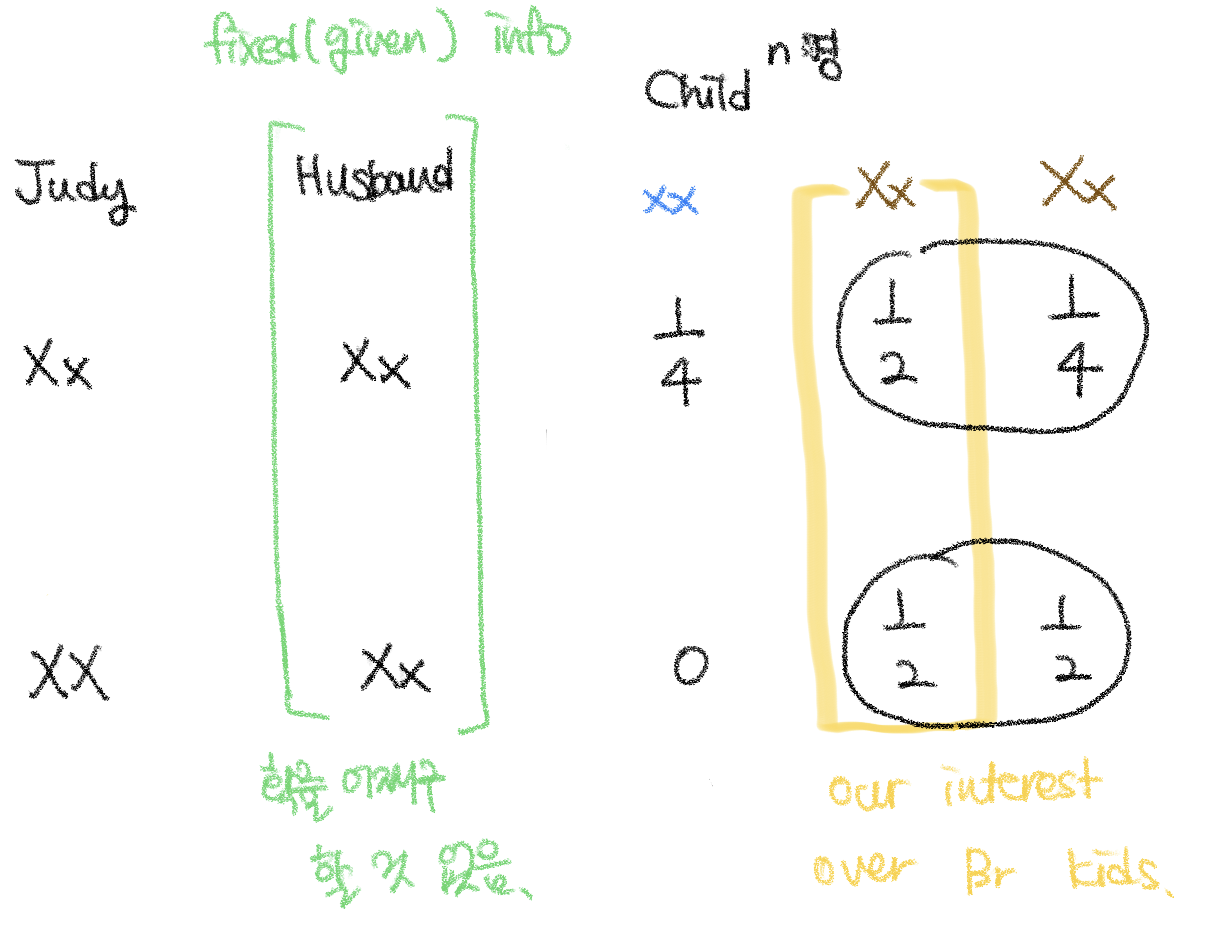

In [10]:
Image("./1주차 복습스터디/2-5.png")

드디어 마지막!  
  
이제 우리는 Judy의 Child가 Xx일 확률을 알고 있다. 그럼 이제 uncertainty는 Judy의 child가 결혼할 배우자의 염색체에만 있으므로 그 부분만 확률을 계산해주면 된다.  
  
Pr(Grandchild = xx | known info so far) = $\dfrac{\Big(\dfrac{2}{3}\Big) 2p \Big(\dfrac{3}{4}\Big)^n + \Big(\dfrac{1}{2}\Big)}{2p \Big(\dfrac{3}{4}\Big)^n+1}* (\dfrac{1}{2}p^2 + \dfrac{1}{4}2p(1-p)) = \dfrac{\Big(\dfrac{2}{3}\Big) 2p \Big(\dfrac{3}{4}\Big)^n + \Big(\dfrac{1}{2}\Big)}{2p \Big(\dfrac{3}{4}\Big)^n+1}* \dfrac{1}{2}p$  

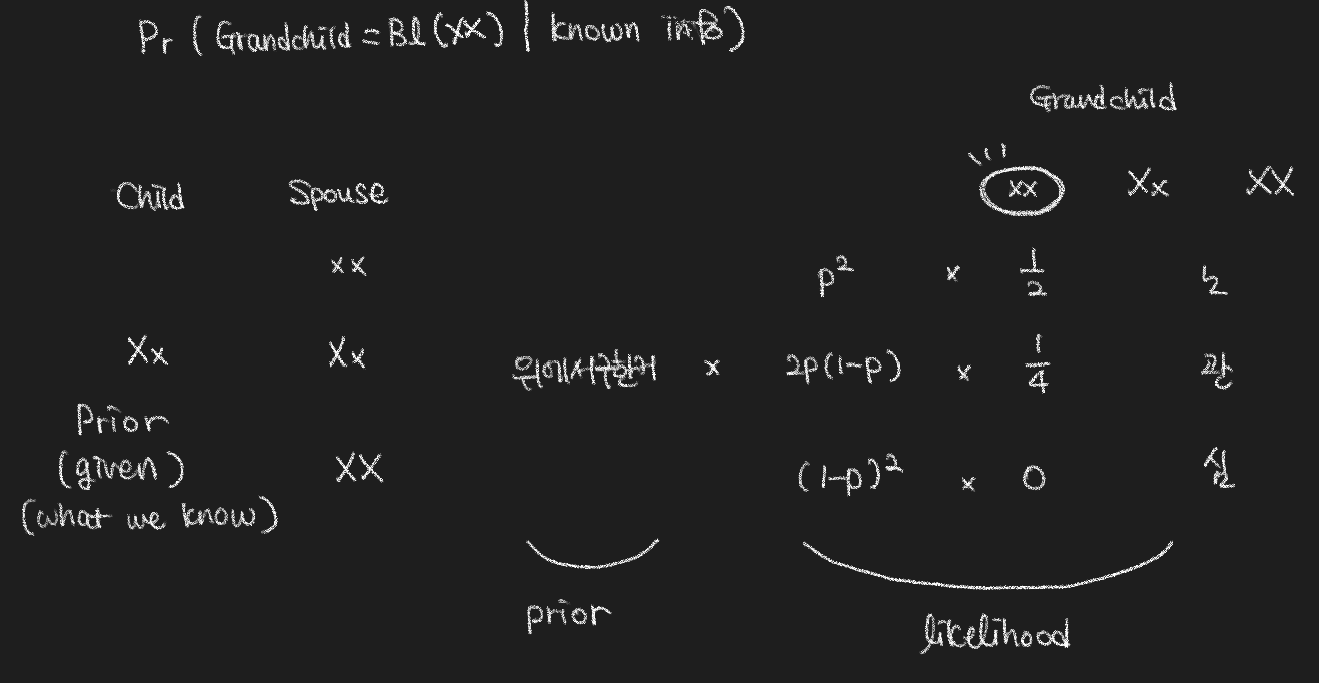

In [11]:
Image("./1주차 복습스터디/2-6.png")

요는  
  
- 각 세대 / 알고싶은 상황에 대해서 uncertain하기 때문에 경우를 나누어 생각해야하는게 무엇인지 vs. 우리가 확실히 확률을 알고 있는건 무엇인지(P(Xx)=~ 이런 것처럼 바로 쓸 수 있는 확률이 무엇인지)를 구별하는게 중요한 것 같고,  
- 조건부 확률을 이용하는 방식이 여러 가지가 있을 수 있는데  
  
$$P(A|B) = \dfrac{P(A,B)}{P(B)}$$   --- 요거는 1, 2번에서 주로 사용해서 문제를 해결하고  
  
$$P(E) = \sum P(E|H_k)P(H_k)$$  --- 이런 law of total prob.를 3번에서 주로 사용해서 문제를 해결  

**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석.  
다른 병원에서의 경험을 통해 생존율은 0.9 정도로 예상되며 0.8 미만이거나 0.97 초과일 것 같지는 않다고 생각한다.**

3-a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter alpha, beta는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라 alpha, beta의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)  
  
$E[\theta] = \dfrac{\alpha}{\alpha+\beta} = 0.9$ 이므로 $\alpha : \beta = 9 : 1 = success : fail$  
  
생존률이 0.8 미만이거나 0.97 초과일 것 같지는 않다고 생각하므로 대부분의 density가 이 구간에 있다고 볼 수 있음.  
$P(\theta \in [0.8, 0.97]) \geq 0.95$

In [12]:
# probability density
k = 4.5
st.beta.cdf(0.97, 9*k, k) - st.beta.cdf(0.80, 9*k, k)

0.9522191509083359

In [13]:
prior = st.beta(9*k, k)

3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

In [14]:
# n = 10, num_sucess = 10
post = st.beta(9*k+10, k+10-10)

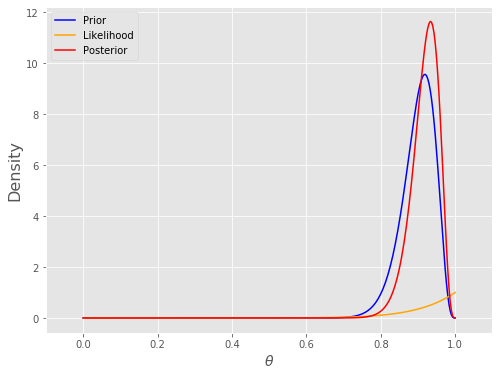

In [15]:
# Visualization
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**0)*likelihood(thetas, 10, 10), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)  
  
\- 다음 환자가 생존할 확률 (n=1, y=1)  
  
Actually mean of posterior distribution!
$p(x_{new}=1 | X) = \displaystyle \int_0^1{p(x_{new}|\theta, X)p(\theta|X)}d\theta 
                     = \displaystyle \int_0^1{p(x_{new}|\theta)p(\theta|X)}d\theta = \displaystyle \int_0^1{\theta p(\theta|X)}d\theta
                     = E[\theta|x] = \dfrac{a+y}{a+b+n}$

In [16]:
st.beta(9*k+10, k+10-10).mean()

0.9181818181818182

\- 다음 20명 중 2명 이상 사망할 확률  
  
$1 \ - \ [ p(x_{death}=0 | X) + p(x_{death}=1 | X) ] = 1 - \displaystyle \int_0^1{\theta^{20} p(\theta|X)}d\theta - \binom{20}{1} \displaystyle \int_0^1{\theta^{19}(1-\theta) p(\theta|X)}d\theta$

In [17]:
from scipy.special import gamma
death0 = (gamma(9*k+10 + k+10-10)*gamma(9*k+10+20))/(gamma(9*k+10)*gamma(9*k+10 + k+10-10 + 20))
death1 = (gamma(9*k+10 + k+10-10)*gamma(9*k+10+19)*gamma(k+10-10+1))/(gamma(9*k+10)*gamma(k+10-10)*gamma(9*k+10 + k+10-10 + 20))

1 - death0 - 20*death1

0.4665179787364557